In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=df = pd.read_excel('Multiple_variable.xlsx',sheet_name='Sheet2')
df.head()

,Age,YearsExperience,Salary,Gender,Classification,Job
0,22,1.1,39343,Female,Low,Assistant
1,22,1.3,46205,Male,TOP,Professor
2,23,1.5,37731,Female,TOP,Administrative
3,24,2.0,43525,Female,Medium,Assistant
4,25,2.2,39891,Male,Medium,Professor


In [3]:
df.shape

(36, 6)

In [4]:
df.describe()

,Age,YearsExperience,Salary
count,36.000000,36.000000,36.000000
mean,34.472222,6.008333,82228.277778
std,6.942565,3.031489,28784.838078
min,22.000000,1.100000,37731.000000
25%,29.000000,3.575000,57050.000000
50%,37.000000,5.600000,82225.500000
75%,40.250000,9.000000,110232.000000
max,49.000000,10.500000,122391.000000


In [5]:
df.dtypes

Age                  int64
YearsExperience    float64
Salary               int64
Gender              object
Classification      object
Job                 object
dtype: object

# EDA

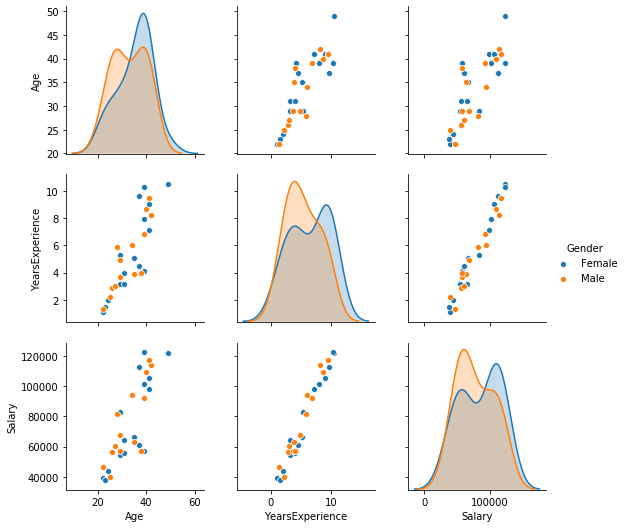

In [6]:
sns.pairplot(df,hue='Gender')

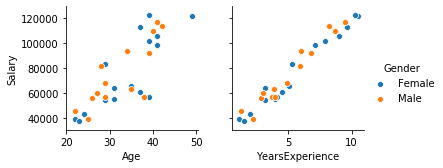

In [7]:
sns.pairplot(df,x_vars=['Age','YearsExperience'],y_vars=['Salary'],hue='Gender')

In [9]:
df.corr()

,Age,YearsExperience,Salary
Age,1.000000,0.858866,0.825977
YearsExperience,0.858866,1.000000,0.982536
Salary,0.825977,0.982536,1.000000


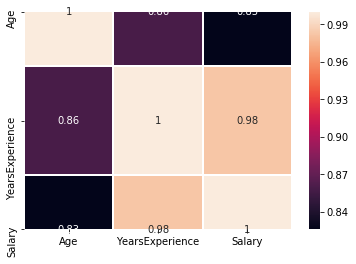

In [8]:
sns.heatmap(df.corr(),annot=True,lw=1)

In [10]:
df.columns

Index(['Age', 'YearsExperience', 'Salary', 'Gender', 'Classification', 'Job'], dtype='object')

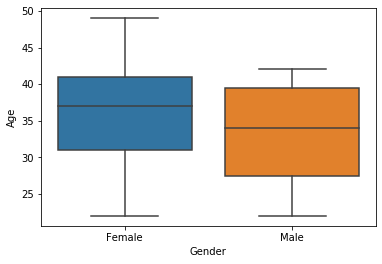

In [15]:
sns.boxplot(y='Age',x='Gender',data=df)

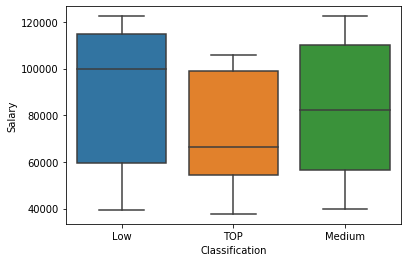

In [17]:
sns.boxplot(y='Salary',x='Classification',data=df)

In [18]:
df.columns

Index(['Age', 'YearsExperience', 'Salary', 'Gender', 'Classification', 'Job'], dtype='object')

In [19]:
X = df[['Age', 'YearsExperience', 'Gender', 'Classification', 'Job']]

In [21]:
X = pd.get_dummies(data=X, drop_first=True)
X.head()

,Age,YearsExperience,Gender_Male,Classification_Medium,Classification_TOP,Job_Assistant,Job_Manager,Job_Professor,Job_Senior Manager
0,22,1.1,0,0,0,1,0,0,0
1,22,1.3,1,0,1,0,0,1,0
2,23,1.5,0,0,1,0,0,0,0
3,24,2.0,0,1,0,1,0,0,0
4,25,2.2,1,1,0,0,0,1,0


In [64]:
Y = df['Salary']
Y

0      39343
1      46205
2      37731
3      43525
4      39891
5      56642
6      60150
7      54445
8      64445
9      57189
10     63218
11     55794
12     56957
13     57081
14     61111
15     67938
16     66029
17     83088
18     81363
19     93940
20     91738
21     98273
22    101302
23    113812
24    109431
25    105582
26    116969
27    112635
28    122391
29    121872
30    105582
31    116969
32    105582
33    116969
34    112635
35    122391
Name: Salary, dtype: int64

In [23]:
from sklearn.model_selection import train_test_split

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.4, random_state=101)

In [33]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(21, 9)
(15, 9)
(21,)
(15,)


In [34]:
from sklearn.linear_model import LinearRegression

In [35]:
model = LinearRegression()

In [36]:
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [37]:
# print the intercept
print(model.intercept_)

40767.075290708104


In [65]:
coeff_parameter = pd.DataFrame(model.coef_,X.columns,columns=['Coefficient'])
coeff_parameter

,Coefficient
Age,-548.323776
YearsExperience,10743.731522
Gender_Male,-655.537127
Classification_Medium,-6061.914786
Classification_TOP,-1234.672994
Job_Assistant,-1114.042048
Job_Manager,2291.025846
Job_Professor,964.080429
Job_Senior Manager,-2141.064227


In [41]:
predictions = model.predict(X_test)
predictions

array([ 80970.53158392,  54147.79230197,  84608.3284182 , 112838.31994826,
       111603.646954  , 121986.73865586, 111208.49523541, 125909.94403861,
       112148.27092338,  43036.55273237, 127901.81847906,  85930.91891418,
        71270.93953831,  62820.7589416 ,  41918.81087788])

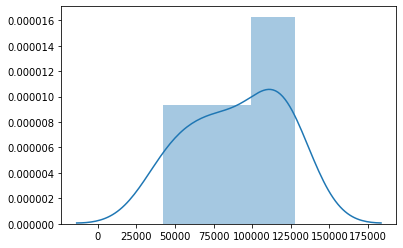

In [47]:
sns.distplot(predictions,bins=3)

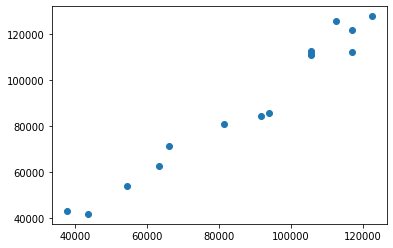

In [43]:
plt.scatter(y_test,predictions)

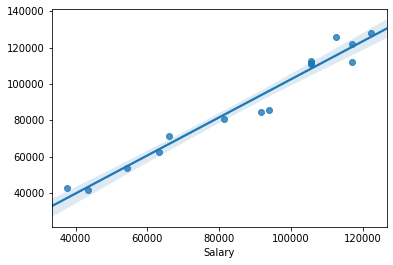

In [44]:
sns.regplot(y_test,predictions)

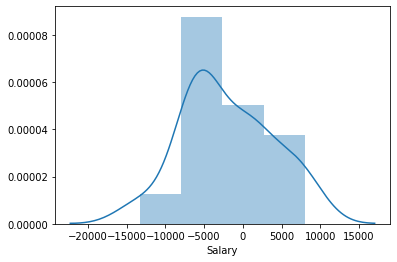

In [45]:
sns.distplot((y_test-predictions),bins=4);

In [48]:
from sklearn import metrics
import numpy as np

In [49]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 5060.536241382566
MSE: 36611111.59339038
RMSE: 6050.711660076886


In [67]:
import statsmodels.api as sm
X_train_Sm= sm.add_constant(X_train)

In [68]:
X_train_Sm= sm.add_constant(X_train)

In [69]:
ls=sm.OLS(y_train,X_train_Sm).fit()

In [70]:
ls.params

const                    32613.660233
Age                       -548.323776
YearsExperience          10743.731522
Gender_Male               -655.537127
Classification_Medium    -6061.914786
Classification_TOP       -1234.672994
Job_Assistant             7039.373010
Job_Manager              10444.440904
Job_Professor             9117.495488
Job_Senior Manager        6012.350831
dtype: float64

In [62]:
print(ls.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.971
Model:                            OLS   Adj. R-squared:                  0.952
Method:                 Least Squares   F-statistic:                     51.09
Date:                Wed, 15 Jul 2020   Prob (F-statistic):           4.20e-08
Time:                        00:54:58   Log-Likelihood:                -207.81
No. Observations:                  21   AIC:                             433.6
Df Residuals:                      12   BIC:                             443.0
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  3.261e+

In [50]:
from statsmodels.formula.api import ols

In [56]:
fit = ols('Salary ~ C(Gender) + C(Job) + Age', data=df).fit() 

In [63]:
print(fit.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     27.22
Date:                Wed, 15 Jul 2020   Prob (F-statistic):           1.15e-10
Time:                        00:55:14   Log-Likelihood:                -386.15
No. Observations:                  36   AIC:                             786.3
Df Residuals:                      29   BIC:                             797.4
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               